# Random Forest

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DataSet

In [2]:
df = pd.read_csv('ece-data-reduced.csv')
df.head(5)

,MATAVERAGE,ECEAVERAGE,ELEAVERAGE,VR,Passer
0,2.70,2.925,2.750000,A,NO
1,2.90,2.650,2.333333,A,NO
2,1.58,1.725,1.333333,AA,YES
3,2.43,2.725,2.416667,AA,YES
4,2.25,2.375,2.500000,A,NO


## Encoding

In [3]:
df['VR'].replace({'AA': 1, 'A': 2, 'BA': 3}, inplace = True)
df['Passer'].replace({'YES': 1, 'NO': 2}, inplace = True)
df.head(5)

,MATAVERAGE,ECEAVERAGE,ELEAVERAGE,VR,Passer
0,2.70,2.925,2.750000,2,2
1,2.90,2.650,2.333333,2,2
2,1.58,1.725,1.333333,1,1
3,2.43,2.725,2.416667,1,1
4,2.25,2.375,2.500000,2,2


## Train - Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = df.loc[:,:'VR']
y = df['Passer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

## Model

In [5]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 10, oob_score = True)

## Fit Training Data

In [6]:
model.fit(X_train, y_train) # Fit the Training Data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

## Prediction

In [7]:
predictions = model.predict(X_test)

## Classification Metrics

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

### Confusion Metrics

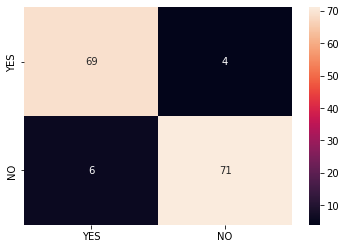

In [12]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = ['YES','NO'], yticklabels = ['YES', 'NO'])

### Classification Report

In [13]:
print('\nRF Classification Report):\n\n{0}'.format(classification_report(y_test, predictions)))


RF Classification Report):

              precision    recall  f1-score   support

           1       0.92      0.95      0.93        73
           2       0.95      0.92      0.93        77

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



## Text Representation of Random Forest

In [14]:
from sklearn import tree

for i in range(0, len(model.estimators_)):

  text_representation = tree.export_text(model.estimators_[i], feature_names = ['MATAVERAGE','ECEAVERAGE','ELEAVERAGE','VR'])
  print('{}:'.format(i))
  print(text_representation)

0:
|--- VR <= 1.50
|   |--- ECEAVERAGE <= 2.66
|   |   |--- ELEAVERAGE <= 2.12
|   |   |   |--- class: 0.0
|   |   |--- ELEAVERAGE >  2.12
|   |   |   |--- class: 0.0
|   |--- ECEAVERAGE >  2.66
|   |   |--- ELEAVERAGE <= 2.71
|   |   |   |--- class: 1.0
|   |   |--- ELEAVERAGE >  2.71
|   |   |   |--- class: 1.0
|--- VR >  1.50
|   |--- ELEAVERAGE <= 1.88
|   |   |--- class: 0.0
|   |--- ELEAVERAGE >  1.88
|   |   |--- ECEAVERAGE <= 2.54
|   |   |   |--- class: 1.0
|   |   |--- ECEAVERAGE >  2.54
|   |   |   |--- class: 1.0

1:
|--- VR <= 1.50
|   |--- MATAVERAGE <= 2.62
|   |   |--- MATAVERAGE <= 2.31
|   |   |   |--- class: 0.0
|   |   |--- MATAVERAGE >  2.31
|   |   |   |--- class: 0.0
|   |--- MATAVERAGE >  2.62
|   |   |--- ECEAVERAGE <= 2.66
|   |   |   |--- class: 1.0
|   |   |--- ECEAVERAGE >  2.66
|   |   |   |--- class: 1.0
|--- VR >  1.50
|   |--- ECEAVERAGE <= 2.36
|   |   |--- MATAVERAGE <= 2.25
|   |   |   |--- class: 0.0
|   |   |--- MATAVERAGE >  2.25
|   |   |   |--- 

## Graphical Representation

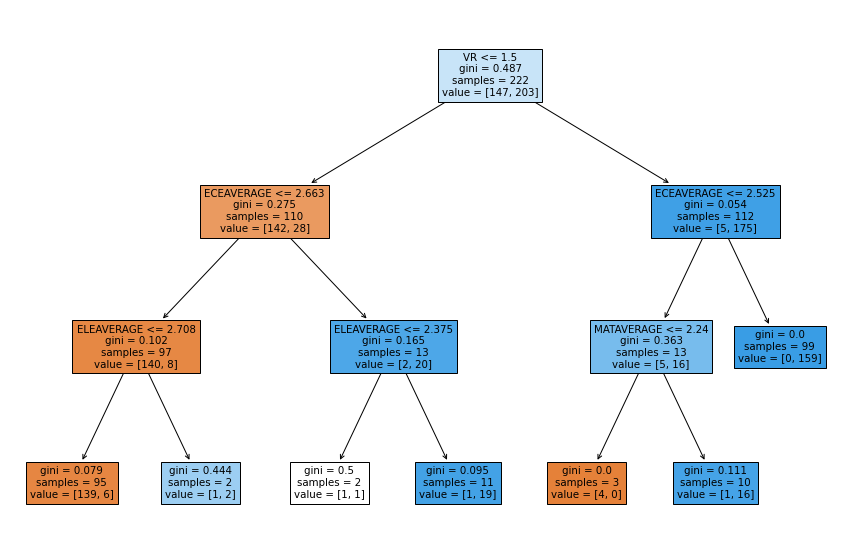

In [15]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model.estimators_[8], feature_names = ['MATAVERAGE','ECEAVERAGE','ELEAVERAGE','VR'], filled = True)

## Permutation Feature Importance

In [16]:
#!pip install eli5 # Installation

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

"""

  Interpretation:

  The values towards the top are the most important features, and those towards the bottom matter least

  The first number in each row shows how much model performance decreased with a random shuffling (in this case, using 'accuracy' as the performance metric)

  Like most things in data science, there is some randomnessto the exact performance change from shufflng a column.

  We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles.

  The number +/- measures how performance varied from one-reshuffling to the next. 

"""

perm = PermutationImportance(model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1387 ± 0.0259,VR
0.0280 ± 0.0297,ECEAVERAGE
0.0227 ± 0.0275,MATAVERAGE
0.0213 ± 0.0177,ELEAVERAGE


## Explained Predictions

In [18]:
index = 1

print('Actual Label:', y_test.iloc[index])
print('Predicted Label:', predictions[index])
print('\n')

X_test.iloc[index]

Actual Label: 1
Predicted Label: 1




MATAVERAGE    2.180
ECEAVERAGE    2.375
ELEAVERAGE    2.000
VR            1.000
Name: 102, dtype: float64

In [19]:
eli5.explain_prediction(model, X_test.iloc[index], feature_names = X_test.columns.tolist())

Explanation(estimator="RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=3, max_features='auto',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=True, random_state=10, verbose=0,\n                       warm_start=False)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.4767142857142857, std=None, value=1.0), FeatureWeight(feature='VR', weight=0.2278156932060233, std=None, value=1.0), FeatureWeight(feature='ECEAVERAGE', weight=0.1674683385974777, std=None, value=2.375), FeatureWeight(feature='ELEAVERAGE', weight=0.054383595334586636, std=None, value=2.0), FeatureWeight(feature='MATAVERAGE', weight=0.051181548322869766, std=None, value=2.18)], neg=[], pos_remaining=0, neg_remaining=0), proba=0.9775634611752432, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Correlation

In [20]:
df.corr()

,MATAVERAGE,ECEAVERAGE,ELEAVERAGE,VR,Passer
MATAVERAGE,1.000000,0.886576,0.835111,0.574259,0.679039
ECEAVERAGE,0.886576,1.000000,0.863991,0.619094,0.692303
ELEAVERAGE,0.835111,0.863991,1.000000,0.614845,0.705461
VR,0.574259,0.619094,0.614845,1.000000,0.803038
Passer,0.679039,0.692303,0.705461,0.803038,1.000000
